<a href="https://colab.research.google.com/github/linccolnevans/datascience/blob/main/Unit6ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

In [14]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt

**Task1**:

Does elpd_loo mean anything if we only have one model?

Yes, although you aren't comparing multiple models you can still use elpd_loo to look at data points and find potential outliers and areas where the model is struggling

**Task2**:

Describe overfitting, in the context of this course

Overfitting in the context of data science is a machine learning issue that will happen when a model is being trained to to fit data too closely. This creats inaccurate predictions.

**Task3**:

How do we mitigate overfitting?

You should improve the training data by increasing its size and diversify it to have a variety of samples. This is to help the model learn patterns and generalize to unseen data.

**Task4**:

How do we mitigate underfitting?

You should switch to a more complex model with greater capacity and add more data to make it have a better fit.

**Task5**:

Why would we want more than one predictor in a model?

Having more than one predictor can give you different results allowing you to have multiple perspectives or different numbers, and that everything has multiple factors affecting it because the world is complex.

**Task6**:

Can we have too many predictors? How would we now?

Yes you can have too many predictors which will lead to overfitting and having too much noise in the data, making patterns unrecognizeable. You will know when the data is too difficult to read and understand.

**Task7**:

What is variable selection, and how does it work?

It is the process of choosing which specific variables froma dataset to include in your model. The purpose is to identify the most important variables that contribute signifigcantly. This will make model performance betteer and make the datas interpretability higher.

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

They all add the variables but the last two look at variables influnece on eachother. An example would be bikes rented using temperature, humidity, wind, weather, weekday, and holidays. Temperature would affect the humidity having a categorical variable with a heirarchy upon the predictor variable.

**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

You can use partial dependence plots, but I dont think you can vizualize the whole model at once using a 2d model.

**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [2]:
import xarray as xr

In [3]:
!pip install bambi


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 3.5 MB/s eta 0:00:00


In [4]:
import bambi as bmb

In [5]:
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt

In [ ]:
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv').dropna()

In [ ]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

In [7]:
#define the model
model_basketball = bmb.Model("`FG%` ~ `FT%` + Pos", data=basketball)
#fit the model
idata_basketball = model_basketball.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

/usr/local/lib/python3.10/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='FT%', ylabel='FG%'>], dtype=object))

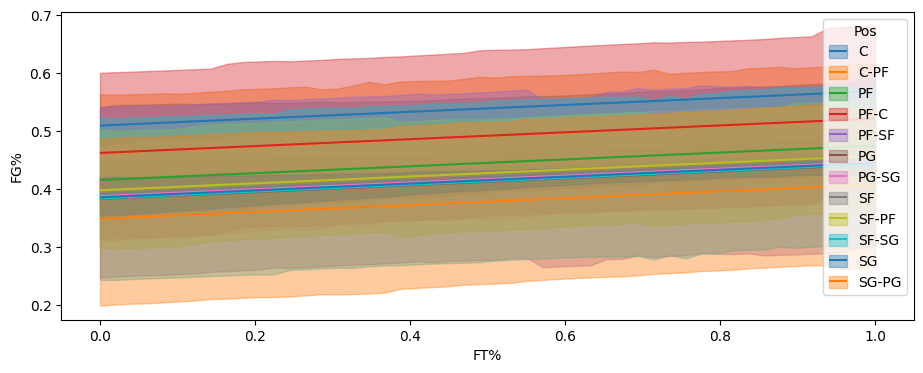

In [8]:
#plot 94% HDIs of the means of each position
bmb.interpret.plot_predictions(model_basketball,
                               idata_basketball,
                                ["FT%",  "Pos"], fig_kwargs={"figsize":(11, 4)})

In [15]:
#define the model, but as a hierarchy
model_basketball_h = bmb.Model("`FG%` ~ (`FT%`|Pos)", data=basketball)
#create the model
idata_basketball_h = model_basketball_h.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

ERROR:pymc.stats.convergence:There were 37 divergences after tuning. Increase `target_accept` or reparameterize.


In [16]:
#define the model; bb_inter stands for baskeball interaction
model_bb_inter = bmb.Model("`FG%` ~ `FT%` + Pos + `FT%`:Pos", data=basketball)
#create the model
idata_bb_inter = model_bb_inter.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

/usr/local/lib/python3.10/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='FT%', ylabel='FG%'>], dtype=object))

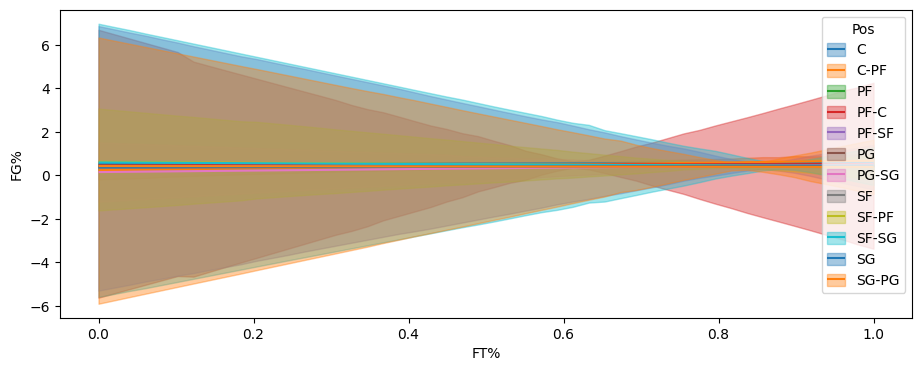

In [11]:
bmb.interpret.plot_predictions(model_bb_inter,
                               idata_bb_inter,
                               ["FT%","Pos"],
                               fig_kwargs={"figsize":(11, 4)})

In [12]:
#define the model; bb_interq stands for baskeball interaction quantiative
model_bb_interq = bmb.Model("`FG%` ~ `FT%` + `3PA` + `FT%`:`3PA`", data=basketball)
#create the model
idata_bb_interq = model_bb_interq.fit(idata_kwargs={'log_likelihood': True})

Sampling chain 1, 0 divergences ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00 / 0:00:21

/usr/local/lib/python3.10/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x1300 with 1 Axes>,
 array([<Axes: xlabel='FT%', ylabel='FG%'>], dtype=object))

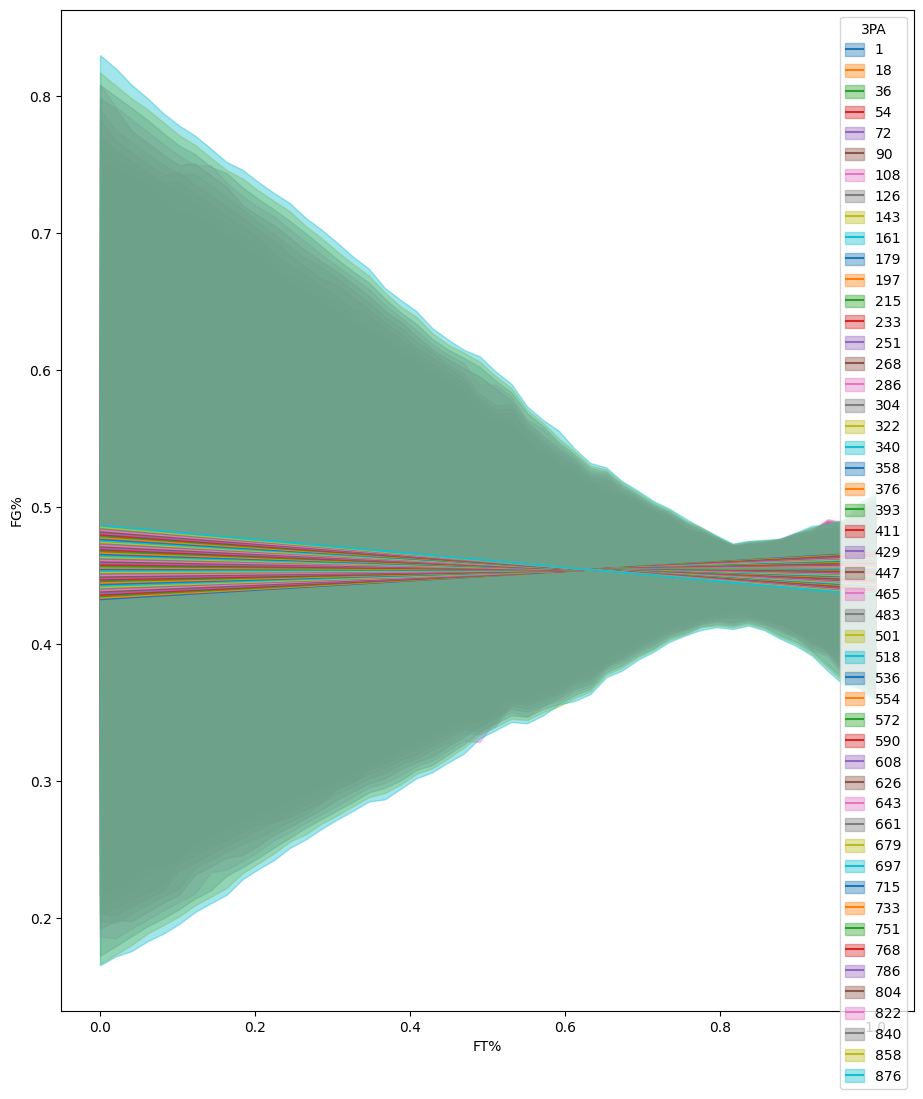

In [13]:
bmb.interpret.plot_predictions(model_bb_interq,
                               idata_bb_interq,
                               ["FT%","3PA"],
                               fig_kwargs={"figsize":(11, 13)})#,
                               #legend=False)

**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

I truly hate all of them, they look messy and hard to read to where i am blinded by a giant chart full of colored lines overlapping, losing all meaning when I stare at them. The best one to read is either the first or second where there is a visible divide between data but it is hard to understand without jotting down the meaning of each line first.